In [1]:
import warnings
warnings.filterwarnings('ignore')

from math import sqrt
from scipy import stats
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from modeling import evaluate

## Credit Card Fraud Detection Project: Classification

### Acquire

In [2]:
df = pd.read_csv('fraudTrain.csv') ## <-- reading csv into pandas
df.shape

(1296675, 23)

In [3]:
df.head(3) ## <-- looking at a sample of our dataframe

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
df = df.drop(columns = "Unnamed: 0") ## <-- dropping the extra index
df.head() 

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.describe().T  ## <-- Looking at our transposed numerical statistics

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [6]:
df.info() ## <-- looking at our columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
df.is_fraud.value_counts() ## <-- looking at target variable value counts

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [8]:
## creating a list of columns I want value counts for

cols = ['state', 'gender', 'category', 'job'] 

for col in cols:
    print(f'{col} Value Counts:\n')
    print(df[col].value_counts())
    print('-----------------------')

state Value Counts:

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64
-----------------------
gender Value Counts:

F    709863
M    586812
Name: gender, dtype: int64
-----------------------
category Value Counts:

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91

### Prepare

In [9]:
df.isna().sum() ## <-- checking for null values we don't have any that is good

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### Creating Datetime object and Columns

In [10]:
df = df.rename(columns = {'trans_date_trans_time': 'trans_time'})
df.head(1)

,trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [11]:
## turn the transaction time to datetime format

df.trans_time = pd.to_datetime(df.trans_time) 

#### Using Datetime 
 - Deriving More Features
     - Hour
     - Weekday
     - Month
     - Year
     

In [12]:
df['weekday'] = df['trans_time'].dt.weekday ## getting weekday column
df['weekday']

0          1
1          1
2          1
3          1
4          1
          ..
1296670    6
1296671    6
1296672    6
1296673    6
1296674    6
Name: weekday, Length: 1296675, dtype: int64

In [13]:
df['trans_hour'] = df['trans_time'].dt.hour ## getting hour column
df['trans_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: trans_hour, Length: 1296675, dtype: int64

In [14]:
df['year'] = df['trans_time'].dt.year ## getting year column
df['year']

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
1296670    2020
1296671    2020
1296672    2020
1296673    2020
1296674    2020
Name: year, Length: 1296675, dtype: int64

In [15]:
df['month'] = df['trans_time'].dt.month ## getting month column
df['month']

0          1
1          1
2          1
3          1
4          1
          ..
1296670    6
1296671    6
1296672    6
1296673    6
1296674    6
Name: month, Length: 1296675, dtype: int64

In [16]:
## making a late_night feature where the transactions of fraud are most commmon

df['late_night'] = np.where(((df.trans_hour == 22) | (df.trans_hour == 23)), 1, 0)
df.late_night.value_counts()

0    1162589
1     134086
Name: late_night, dtype: int64

#### Feature Engineering

In [17]:
## making boolean columns for hypothesized common fraud purchase categories

df['entertainment'] = np.where(df.category == 'entertainment', 1, 0)
df['home'] = np.where(df.category == 'home', 1, 0)
df['shopping_net'] = np.where(df.category == 'shopping_net', 1, 0)
df['misc_net'] = np.where(df.category == 'misc_net', 1, 0)
df['grocery_net'] = np.where(df.category == 'grocery_net', 1, 0)
df['grocery_pos'] = np.where(df.category == 'grocery_pos', 1, 0)
df['travel'] = np.where(df.category == 'travel', 1, 0)

## making a high fraud category where fraud transactions is most likely based on crosstabs
df['high_fraud_cat'] = np.where(((df.category == 'grocery_pos') | (df.category == 'shopping_net')), 1, 0)

## making boolean columns for other columns that may be valueable to split up

df['is_male'] = np.where(df.gender == 'M', 1, 0)
df['is_female'] = np.where(df.gender == 'F', 1, 0)

## States with highest amounts of CC Fraud (looked on internet)

df['Nevada'] = np.where(df.state == 'NV', 1, 0)
df['California'] = np.where(df.state == 'CA', 1, 0)
df['New_Mexico'] = np.where(df.state == 'NM', 1, 0)
df['Florida'] = np.where(df.state == 'FL', 1, 0)
df['Texas'] = np.where(df.state == 'TX', 1, 0)
df['Virginia'] = np.where(df.state == 'VA', 1, 0)
df['Arizona'] = np.where(df.state == 'AZ', 1, 0)

In [18]:
## Getting the Age of the Customer

df['dob'] = pd.to_datetime(df['dob'])
df['customer_age'] = np.round((df['trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

df['customer_age'] = df['customer_age'].astype(int)
df['customer_age']

0          31
1          41
2          57
3          52
4          33
           ..
1296670    59
1296671    41
1296672    53
1296673    40
1296674    25
Name: customer_age, Length: 1296675, dtype: int64

#### Making Bins

In [19]:
## Looking at our maximum age and minimum age to make some age bins

df.customer_age.max(), df.customer_age.min()

(96, 14)

In [20]:
## creating the age bins with integer labels for easier feature engineering

df['age_bin'] = pd.cut(df.customer_age, 
                       bins = [0, 20, 40, 60, 96],
                       labels = [1, 2, 3, 4])

df['age_bin'].value_counts() ## <-- quality assurance check of column values

2    502486
3    488483
4    262691
1     43015
Name: age_bin, dtype: int64

In [21]:
## Looking at our maximum amount and minimum amount to make some transaction amount bins

df.amt.max(), df.amt.min()

(28948.9, 1.0)

<AxesSubplot:xlabel='amt'>

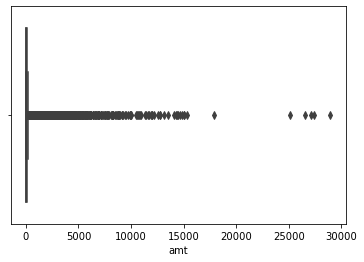

In [22]:
## Visualizing amounts to help my decision with binning

sns.boxplot(data = df, x = 'amt')

In [23]:
## creating the amount bins with integer labels for easier feature engineering

df['amt_bin'] = pd.cut(df.amt, 
                       bins = [0, 25, 40, 50, 100, 200, 30000],
                       labels = [1, 2, 3, 4, 5, 6])

df['amt_bin'].value_counts() ## <-- quality assurance check of my amt_bin column

1    463556
4    389483
5    172969
2    118829
3     89914
6     61924
Name: amt_bin, dtype: int64

##### Using Bins to Make Features

In [24]:
## Making categorical Columns for the amount bin that I created

df['0-25_dollars'] = np.where(df.amt_bin == 1, 1, 0)
df['25-40_dollars'] = np.where(df.amt_bin == 2, 1, 0)
df['40-50_dollars'] = np.where(df.amt_bin == 3, 1, 0)
df['50-100_dollars'] = np.where(df.amt_bin == 4, 1, 0)
df['100-200_dollars'] = np.where(df.amt_bin == 5, 1, 0)
df['high_dollars'] = np.where(df.amt_bin == 6, 1, 0)

## Making categorical Columns for the age bin that I created

df['0-20_age'] = np.where(df.age_bin == 1, 1, 0)
df['20-40_age'] = np.where(df.age_bin == 2, 1, 0)
df['40-60_age'] = np.where(df.age_bin == 3, 1, 0)
df['60-96_age'] = np.where(df.age_bin == 4, 1, 0)

#### Performing Train Test Split

In [25]:
## splitting the data stratifying for out target variable is_fraud

train_validate, test = train_test_split(df, test_size=.2, 
                                    random_state=123,
                                    stratify = df.is_fraud)
train, validate = train_test_split(train_validate, test_size=.3, 
                               random_state=123,
                               stratify= train_validate.is_fraud)

In [26]:
train.shape, validate.shape, test.shape ## <-- making sure our shapes look good

((726138, 57), (311202, 57), (259335, 57))

#### Making sure we have positive cases of fraud in each split

In [27]:
train.is_fraud.value_counts()

0    721934
1      4204
Name: is_fraud, dtype: int64

In [28]:
validate.is_fraud.value_counts()

0    309401
1      1801
Name: is_fraud, dtype: int64

In [29]:
test.is_fraud.value_counts()

0    257834
1      1501
Name: is_fraud, dtype: int64

#### Peeking at Train Split

In [30]:
print(train.columns)

train.head(3)

Index(['trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'weekday', 'trans_hour', 'year', 'month', 'late_night',
       'entertainment', 'home', 'shopping_net', 'misc_net', 'grocery_net',
       'grocery_pos', 'travel', 'high_fraud_cat', 'is_male', 'is_female',
       'Nevada', 'California', 'New_Mexico', 'Florida', 'Texas', 'Virginia',
       'Arizona', 'customer_age', 'age_bin', 'amt_bin', '0-25_dollars',
       '25-40_dollars', '40-50_dollars', '50-100_dollars', '100-200_dollars',
       'high_dollars', '0-20_age', '20-40_age', '40-60_age', '60-96_age'],
      dtype='object')


,trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,0-25_dollars,25-40_dollars,40-50_dollars,50-100_dollars,100-200_dollars,high_dollars,0-20_age,20-40_age,40-60_age,60-96_age
76830,2019-02-15 02:48:54,180011453250192,fraud_Volkman-Predovic,shopping_net,97.35,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,...,0,0,0,1,0,0,0,1,0,0
140225,2019-03-17 15:01:34,676308307625,fraud_Thiel PLC,misc_pos,160.97,Donald,Evans,M,1287 Michael Roads,Washoe Valley,...,0,0,0,0,1,0,0,1,0,0
539623,2019-08-19 10:08:47,3597337756918966,fraud_Heidenreich PLC,grocery_pos,73.17,Linda,Gonzalez,F,17667 Price Spur Apt. 366,Glen Rock,...,0,0,0,1,0,0,0,0,0,1


### Explore

#### Engineered Variable Distributions

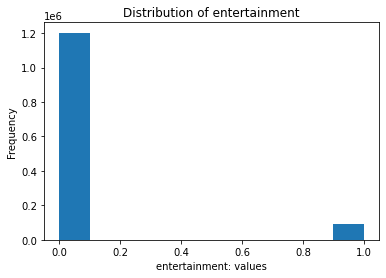

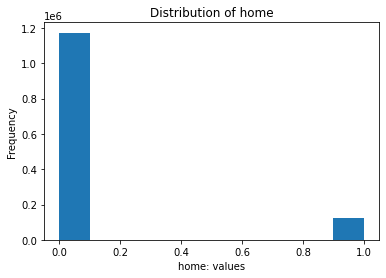

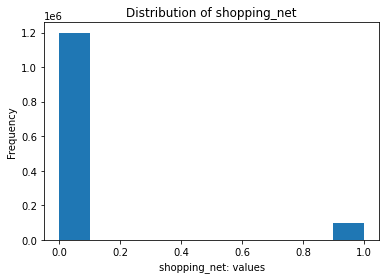

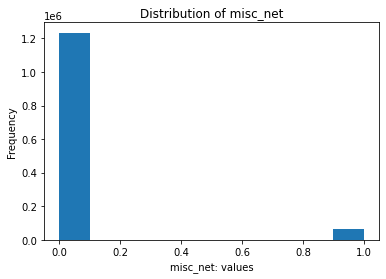

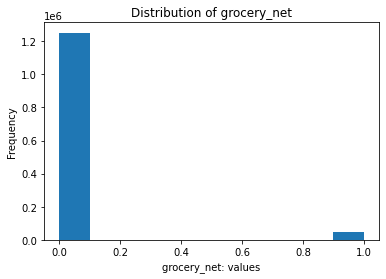

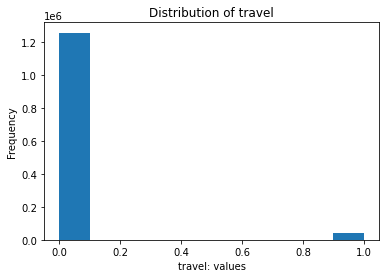

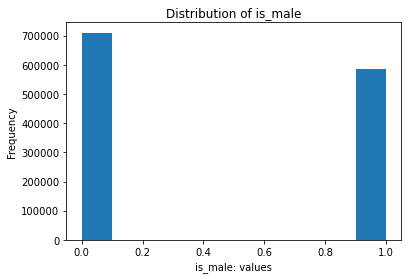

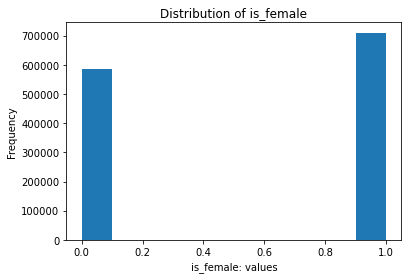

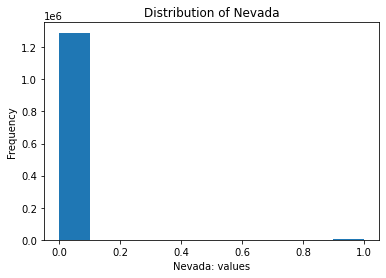

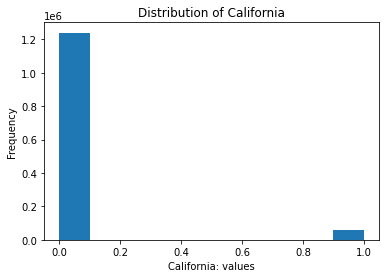

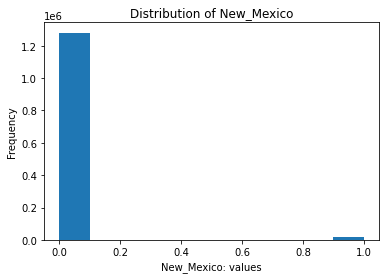

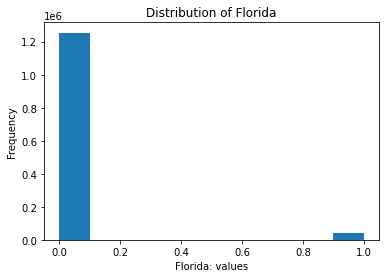

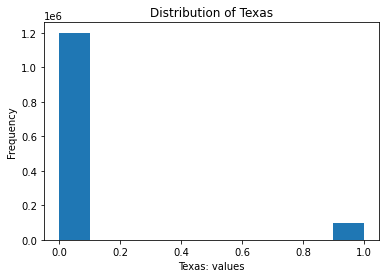

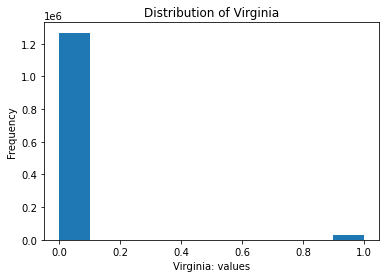

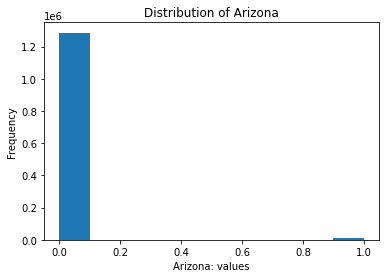

In [31]:
cols = ['entertainment', 'home', 'shopping_net', 'misc_net', 
        'grocery_net', 'travel', 'is_male', 'is_female',
        'Nevada', 'California', 'New_Mexico', 'Florida',
        'Texas', 'Virginia', 'Arizona']

for col in cols:
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.xlabel(f'{col}: values')
    plt.show()

#### Bar Graphs

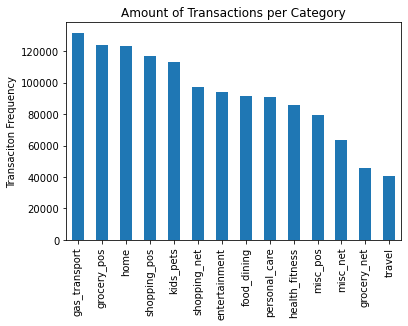

In [32]:
df['category'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Category')
plt.show()

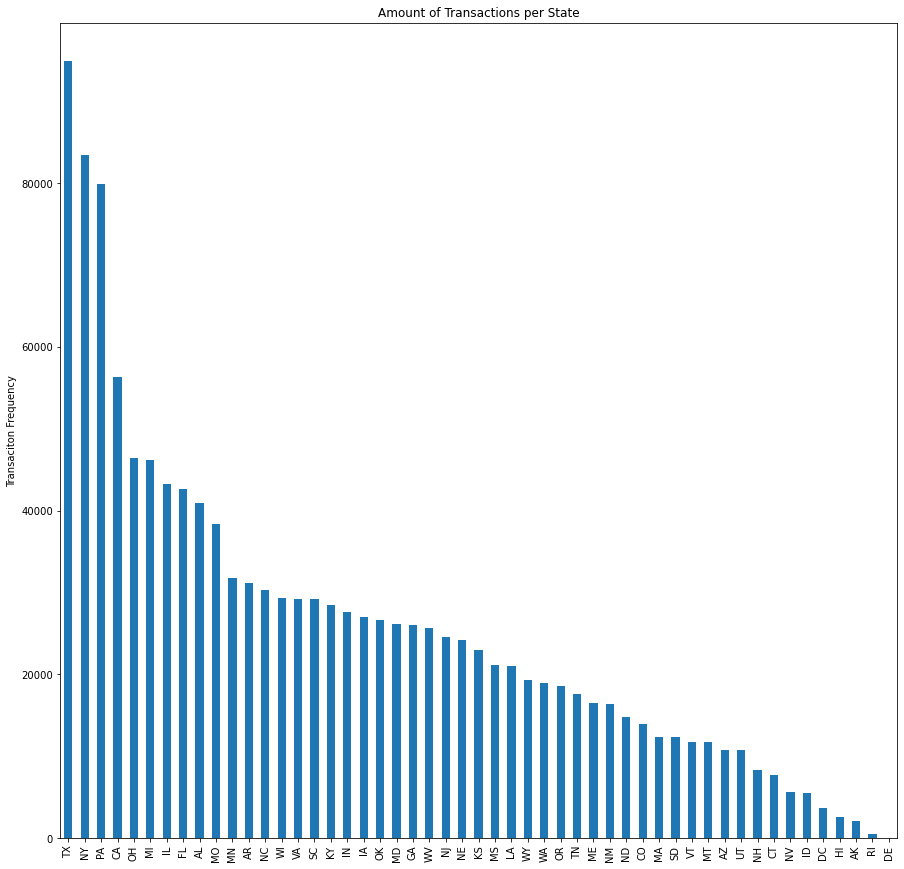

In [33]:
plt.figure(figsize = (15,15))
df['state'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per State')
plt.show()

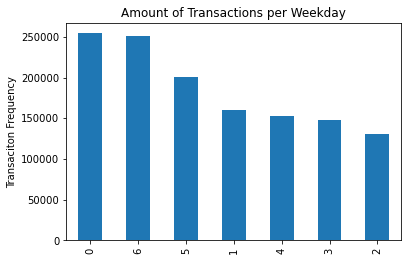

In [34]:
df['weekday'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Weekday')
plt.show()

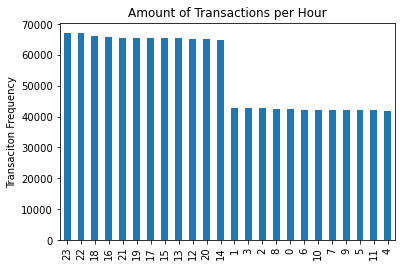

In [35]:
df['trans_hour'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Hour')
plt.show()

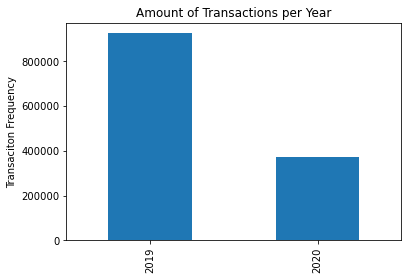

In [36]:
df['year'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Year')
plt.show()

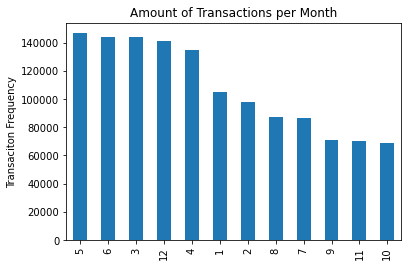

In [37]:
df['month'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Month')
plt.show()

#### Heatmap with target variable

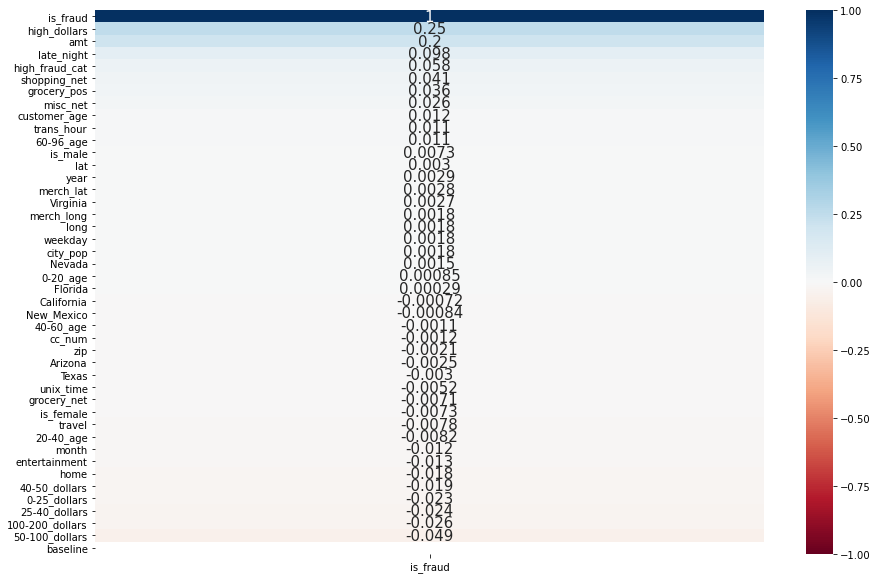

In [78]:
## making a heap map to look at correlations with is_fraud for the train data set
## helping me choose which features to use in my model

plt.figure(figsize = (15,10))  
sns.heatmap(train.corr()[['is_fraud']].sort_values(by='is_fraud', ascending = False), 
            cmap = 'RdBu', vmax = 1, vmin = -1, center = 0, annot = True, annot_kws={"size": 15} )
plt.show()                    

#### Crosstabs Looking for Fraud

In [39]:
ctab = pd.crosstab(df.weekday, df.is_fraud)
ctab = ctab.sort_values(by = 1, ascending = False)
ctab.head(5)

is_fraud,0,1
weekday,,
5,199730,1227
6,249363,1216
0,253100,1182
4,151193,1079
3,146277,1008


Friday and Saturdays have the highest amounts of Fraud

In [40]:
ctab = pd.crosstab(df.month, df.is_fraud)
ctab = ctab.sort_values(by = 1, ascending = False)
ctab.head(5)

is_fraud,0,1
month,,
3,142851,938
5,145940,935
2,96804,853
1,103878,849
6,143123,688


March and May have the highest amount of Fraud

In [41]:
ctab = pd.crosstab(df.trans_hour, df.is_fraud)
ctab = ctab.sort_values(by = 1, ascending = False)
ctab.head(5)

is_fraud,0,1
trans_hour,,
22,65051,1931
23,65200,1904
1,42211,658
0,41867,635
2,42031,625


12 AM and 11 PM transactions have a very high amount of fraud transactions compared to the others times of day

In [42]:
ctab = pd.crosstab(df.category, df.is_fraud)
ctab = ctab.sort_values(by = 1, ascending = False)
ctab.head(5)

is_fraud,0,1
category,,
grocery_pos,121895,1743
shopping_net,95830,1713
misc_net,62372,915
shopping_pos,115829,843
gas_transport,131041,618


grocery_pos and shopping_net have high amounts of fraud transactions compared to other categories

In [43]:
ctab = pd.crosstab(df.state, df.is_fraud)
ctab = ctab.sort_values(by = 1, ascending = False)
ctab.head(5)

is_fraud,0,1
state,,
NY,82946,555
TX,94397,479
PA,79389,458
CA,56034,326
OH,46159,321


New York and Texas have the highest amount of fraud transactions compared to other states

In [44]:
ctab = pd.crosstab(df.city, df.is_fraud)
ctab = ctab.sort_values(by = 1, ascending = False)
ctab.head(5)

is_fraud,0,1
city,,
Houston,4129,39
Warren,4566,33
Naples,4126,29
Huntsville,3531,29
Topeka,3001,27


Houston and Warren have the highest amount of fraud transactions out of all the cities

In [45]:
ctab = pd.crosstab(df.job, df.is_fraud)
ctab = ctab.sort_values(by = 1, ascending = False)
ctab.head(5)

is_fraud,0,1
job,,
Materials engineer,8208,62
Trading standards officer,4585,56
Naval architect,8631,53
Exhibition designer,9148,51
"Surveyor, land/geomatics",8630,50


Materials engineer and Trading standards officers are victims of fraud the most frequently

In [46]:
ctab = pd.crosstab(df.merchant, df.is_fraud)
ctab = ctab.sort_values(by = 1, ascending = False)
ctab.head(8)

is_fraud,0,1
merchant,,
fraud_Rau and Sons,2441,49
fraud_Kozey-Boehm,1818,48
fraud_Cormier LLC,3601,48
fraud_Vandervort-Funk,2427,47
fraud_Doyle Ltd,2511,47
fraud_Kilback LLC,4356,47
fraud_Kuhn LLC,3466,44
fraud_Padberg-Welch,2380,44


There isn't much variance in the merchant column and the amount of fraud transactions, however, Rau and Sons and Kozey_Boehm have the most fraud transactions

### Explore: Statistical Testing

#### Chi Square Testing

In [47]:
## Universally our alpha value for all testing 

alpha = 0.05

##### Online Shopping vs Fraud

Question: Is there a significant relationship between the two categorical variables: online shopping (shopping_net column) and the target variable is_fraud

 - $H_0$: There is no relationship between a cc transaction being used for online shopping and whether the transaction was fraud

 - $H_a$: There is a significant relationship between a cc transaction being used for online shopping and whether the transaction was fraud

In [48]:
## creating our observed crosstab of the two categories

observed = pd.crosstab(df.shopping_net, df.is_fraud) 
observed

is_fraud,0,1
shopping_net,,
0,1193339,5793
1,95830,1713


In [49]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1193339    5793]
 [  95830    1713]]
---
Expected

[[1.19219064e+06 6.94135754e+03]
 [9.69783575e+04 5.64642457e+02]]
---

chi^2 = 2537.9782
p     = 0.0000


Since the p-value returned is less than our alpha and near 0 we can determine there is a significnat relationship between a cc transaction being used for online shopping and whether the transaction was fraud.

##### Expensive Transactions vs Fraud

Question: Is there a significant relationship between the two categorical variables: expensive transactions (high_dollars column) and the target variable is_fraud

 - $H_0$: There is no relationship between a cc transaction being expensive and whether the transaction was fraud

 - $H_a$: There is a significant relationship between a cc transaction being expensive and whether the transaction was fraud

In [50]:
## creating our observed crosstab of the two categories

observed = pd.crosstab(df.high_dollars, df.is_fraud) 
observed

is_fraud,0,1
high_dollars,,
0,1232949,1802
1,56220,5704


In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1232949    1802]
 [  56220    5704]]
---
Expected

[[1.22760346e+06 7.14754353e+03]
 [6.15655435e+04 3.58456471e+02]]
---

chi^2 = 84185.8505
p     = 0.0000


Since the p-value returned is less than our alpha and near 0 we can determine there is a significnat relationship a cc transaction being expensive and whether the transaction was fraud.

##### Late at Night vs Fraud

Question: Is there a significant relationship between the two categorical variables: if the transaction was late at night (late_night column 10PM or 11PM) and the target variable is_fraud

 - $H_0$: There is no relationship between a cc transaction being late at night and whether the transaction was fraud

 - $H_a$: There is a significant relationship between a cc transaction being late at night and whether the transaction was fraud

In [52]:
## creating our observed crosstab of the two categories

observed = pd.crosstab(df.late_night, df.is_fraud) 
observed

is_fraud,0,1
late_night,,
0,1158918,3671
1,130251,3835


In [53]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1158918    3671]
 [ 130251    3835]]
---
Expected

[[1.15585918e+06 6.72982284e+03]
 [1.33309823e+05 7.76177158e+02]]
---

chi^2 = 13518.6091
p     = 0.0000


Since the p-value returned is less than our alpha and near 0 we can determine there is a significnat relationship a cc transaction being late at night and whether the transaction was fraud.

##### High Fraud Transaction Category vs Fraud

Question: Is there a significant relationship between the two categorical variables: if the transaction was in the high fraud category (high_fraud_cat column online shopping and grocery point of sale transactions) and the target variable is_fraud

 - $H_0$: There is no relationship between a cc transaction being in the high fraud category and whether the transaction was fraud

 - $H_a$: There is a significant relationship between a cc transaction being in the high fraud category and whether the transaction was fraud

In [54]:
## creating our observed crosstab of the two categories

observed = pd.crosstab(df.high_fraud_cat, df.is_fraud) 
observed

is_fraud,0,1
high_fraud_cat,,
0,1071444,4050
1,217725,3456


In [55]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1071444    4050]
 [ 217725    3456]]
---
Expected

[[1069268.33978136    6225.66021864]
 [ 219900.66021864    1280.33978136]]
---

chi^2 = 4481.2760
p     = 0.0000


Since the p-value returned is less than our alpha and near 0 we can determine there is a significnat relationship a cc transaction being in the high fraud category and whether the transaction was fraud.

##### 50 - 100 Dollar Transactions vs Fraud

Question: Is there a significant relationship between the two categorical variables: if the transaction was between the 50 to 100 dollar range and the target variable is_fraud

 - $H_0$: There is no relationship between a cc transaction being in the 50 to 100 dollar range and whether the transaction was fraud

 - $H_a$: There is a significant relationship between a cc transaction being in the 50 to 100 dollar range and whether the transaction was fraud

In [56]:
## creating our observed crosstab of the two categories

observed = pd.crosstab(df['50-100_dollars'], df.is_fraud) 
observed

is_fraud,0,1
50-100_dollars,,
0,899731,7461
1,389438,45


In [57]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[899731   7461]
 [389438     45]]
---
Expected

[[901940.58144716   5251.41855284]
 [387228.41855284   2254.58144716]]
---

chi^2 = 3111.7933
p     = 0.0000


Since the p-value returned is less than our alpha and near 0 we can determine there is a significnat relationship a cc transaction being in the 50 to 100 dollar range and whether the transaction was fraud.

### Modeling

##### Splitting X and Y's

In [58]:
## making my list of X dataframe features
cols = ['high_dollars', 'late_night', 'amt', 'high_fraud_cat']

## Splitting into X and Y's
X_train, y_train = train[cols], train.is_fraud
X_validate, y_validate = validate[cols], validate.is_fraud
X_test, y_test = test[cols], test.is_fraud

In [59]:
X_train.head(3) ## checking our X dataframe

,high_dollars,late_night,amt,high_fraud_cat
76830,0,0,97.35,1
140225,0,0,160.97,0
539623,0,0,73.17,1


In [60]:
y_train.head() ## checking our y is only our target variable

76830     0
140225    0
539623    0
881124    0
604989    0
Name: is_fraud, dtype: int64

##### Using Resampling on X_train: SMOTE Method

In [75]:
from imblearn.over_sampling import SMOTE

## using an oversampling technique to make the train x and y's have equal positive and
## negative cases

smote = SMOTE(random_state = 123)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [87]:
y_train_smote.value_counts() ## <-- quality assurance check

1    721934
0    721934
Name: is_fraud, dtype: int64

##### Determining our Baseline Accuracy

In [61]:
train.is_fraud.value_counts() ## doing value counts to look at what should be our baseline

0    721934
1      4204
Name: is_fraud, dtype: int64

In [62]:
train['baseline'] = 0 ## making our baseline column
train.baseline

76830     0
140225    0
539623    0
881124    0
604989    0
         ..
328365    0
4437      0
97469     0
156421    0
31649     0
Name: baseline, Length: 726138, dtype: int64

In [63]:
## calculating a baseline accuracy
base_acc = (train.baseline == train.is_fraud).mean()
print(f'The baseline accuracy is: {base_acc:.4f}')

The baseline accuracy is: 0.9942


### Train Tests

#### Decision Tree Classifier Train test¶

In [79]:
model = DecisionTreeClassifier(random_state = 123, max_depth = 3)   #making a decision tree model
model.fit(X_train_smote, y_train_smote)              # fitting the model to train df's
 
print(f'The baseline accuracy is: {base_acc:.4%}') # printing out the basleline accuracy for comparison
evaluate(X_train_smote, y_train_smote, model)      # printing out model scores on train df

The baseline accuracy is: 99.4210%

    The accuracy for our model is 87.4077%
    The True Positive Rate is 95.055%,    The False Positive Rate is 20.240%,
    The True Negative Rate is 79.760%,    The False Negative Rate is 4.945%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 575817,False positive: 146117
actual_fraud,False Negative: 35699,True Positive: 686235



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.941622,0.797603,0.863650,7.219340e+05
fraud,0.824453,0.950551,0.883023,7.219340e+05
accuracy,0.874077,0.874077,0.874077,8.740771e-01
macro avg,0.883038,0.874077,0.873336,1.443868e+06
weighted avg,0.883038,0.874077,0.873336,1.443868e+06


#### Random Forest Model Train Test

In [80]:
forest_model = RandomForestClassifier()   # making a random forest model
forest_model.fit(X_train_smote, y_train_smote)       # fitting the model to train

print(f'The baseline accuracy is: {base_acc:.4%}')   # printing out the baseline for comparison
evaluate(X_train_smote, y_train_smote, forest_model)   #printing out model scores for train

The baseline accuracy is: 99.4210%

    The accuracy for our model is 99.5648%
    The True Positive Rate is 99.627%,    The False Positive Rate is 0.497%,
    The True Negative Rate is 99.503%,    The False Negative Rate is 0.373%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 718347,False positive: 3587
actual_fraud,False Negative: 2696,True Positive: 719238



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.996261,0.995031,0.995646,7.219340e+05
fraud,0.995038,0.996266,0.995651,7.219340e+05
accuracy,0.995648,0.995648,0.995648,9.956485e-01
macro avg,0.995649,0.995648,0.995648,1.443868e+06
weighted avg,0.995649,0.995648,0.995648,1.443868e+06


#### KNN Model Train Test¶


In [81]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #making a k nearest neighbor model 
knn_model.fit(X_train_smote, y_train_smote) #fitting the model to train

print(f'The baseline accuracy is: {base_acc:.4%}') #printing out the baseline accuracy for comparison
evaluate(X_train_smote, y_train_smote, knn_model) #using evaluate function from evaluation file to print out scores

The baseline accuracy is: 99.4210%

    The accuracy for our model is 97.6964%
    The True Positive Rate is 97.142%,    The False Positive Rate is 1.749%,
    The True Negative Rate is 98.251%,    The False Negative Rate is 2.858%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 709306,False positive: 12628
actual_fraud,False Negative: 20633,True Positive: 701301



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.971733,0.982508,0.977091,7.219340e+05
fraud,0.982312,0.971420,0.976836,7.219340e+05
accuracy,0.976964,0.976964,0.976964,9.769640e-01
macro avg,0.977023,0.976964,0.976963,1.443868e+06
weighted avg,0.977023,0.976964,0.976963,1.443868e+06


#### Logistic Regression Model Train Test

In [82]:
logic_model = LogisticRegression(random_state = 123)  ##making a logistic regression model
logic_model.fit(X_train_smote, y_train_smote) ##fitting model to train

print(f'The baseline accuracy is: {base_acc:.4%}')
evaluate(X_train_smote, y_train_smote, logic_model)

The baseline accuracy is: 99.4210%

    The accuracy for our model is 86.1075%
    The True Positive Rate is 85.630%,    The False Positive Rate is 13.415%,
    The True Negative Rate is 86.585%,    The False Negative Rate is 14.370%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 625086,False positive: 96848
actual_fraud,False Negative: 103741,True Positive: 618193



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.857660,0.865849,0.861735,7.219340e+05
fraud,0.864556,0.856301,0.860409,7.219340e+05
accuracy,0.861075,0.861075,0.861075,8.610753e-01
macro avg,0.861108,0.861075,0.861072,1.443868e+06
weighted avg,0.861108,0.861075,0.861072,1.443868e+06


#### Random Forest Model II Train Test

In [83]:
forest_model2 = RandomForestClassifier(max_leaf_nodes = 50)
forest_model2.fit(X_train_smote, y_train_smote)

print(f'The baseline accuracy is: {base_acc:.4%}')  ##printing baseline accuracy to compare
evaluate(X_train_smote, y_train_smote, forest_model2)

The baseline accuracy is: 99.4210%

    The accuracy for our model is 91.2719%
    The True Positive Rate is 91.299%,    The False Positive Rate is 8.755%,
    The True Negative Rate is 91.245%,    The False Negative Rate is 8.701%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 658726,False positive: 63208
actual_fraud,False Negative: 62814,True Positive: 659120



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.912945,0.912446,0.912695,7.219340e+05
fraud,0.912494,0.912992,0.912743,7.219340e+05
accuracy,0.912719,0.912719,0.912719,9.127192e-01
macro avg,0.912719,0.912719,0.912719,1.443868e+06
weighted avg,0.912719,0.912719,0.912719,1.443868e+06


### Validate Tests

#### Random Forest Model I Validate Test

In [84]:
print(f'The baseline accuracy is: {base_acc:.4%}')  ##printing baseline accuracy to compare
evaluate(X_validate, y_validate, forest_model)

The baseline accuracy is: 99.4210%

    The accuracy for our model is 98.1080%
    The True Positive Rate is 66.241%,    The False Positive Rate is 1.707%,
    The True Negative Rate is 98.293%,    The False Negative Rate is 33.759%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 304121,False positive: 5280
actual_fraud,False Negative: 608,True Positive: 1193



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.998005,0.982935,0.990412,309401.00000
fraud,0.184304,0.662410,0.288373,1801.00000
accuracy,0.981080,0.981080,0.981080,0.98108
macro avg,0.591154,0.822672,0.639393,311202.00000
weighted avg,0.993296,0.981080,0.986350,311202.00000


#### KNN Model Validate Test

In [85]:
print(f'The baseline accuracy is: {base_acc:.4%}')  ##printing baseline accuracy to compare
evaluate(X_validate, y_validate, knn_model)

The baseline accuracy is: 99.4210%

    The accuracy for our model is 97.7571%
    The True Positive Rate is 73.182%,    The False Positive Rate is 2.100%,
    The True Negative Rate is 97.900%,    The False Negative Rate is 26.818%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 302904,False positive: 6497
actual_fraud,False Negative: 483,True Positive: 1318



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.998408,0.979001,0.988609,309401.000000
fraud,0.168650,0.731816,0.274126,1801.000000
accuracy,0.977571,0.977571,0.977571,0.977571
macro avg,0.583529,0.855409,0.631368,311202.000000
weighted avg,0.993606,0.977571,0.984475,311202.000000


#### Random Forest Model II Validate Test

In [86]:
print(f'The baseline accuracy is: {base_acc:.4%}')  ##printing baseline accuracy to compare
evaluate(X_validate, y_validate, forest_model2)

The baseline accuracy is: 99.4210%

    The accuracy for our model is 91.2488%
    The True Positive Rate is 89.728%,    The False Positive Rate is 8.742%,
    The True Negative Rate is 91.258%,    The False Negative Rate is 10.272%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 282352,False positive: 27049
actual_fraud,False Negative: 185,True Positive: 1616



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.999345,0.912576,0.953992,309401.000000
fraud,0.056375,0.897279,0.106085,1801.000000
accuracy,0.912488,0.912488,0.912488,0.912488
macro avg,0.527860,0.904928,0.530039,311202.000000
weighted avg,0.993888,0.912488,0.949085,311202.000000
